In [1]:
using CausalForest
using StatsBase
using Plots
using Distributions

Modèle 

$$Y = 10 X_1 + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

Epsilon suit loi normale (0,1).

$n=10^3$ observations

In [2]:
n, m = 10^3, 10
u = Uniform()
features = rand(u, (n, m))
d = Normal()
eps = rand(d, 1000)
labels = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]  .+ eps

model = build_forest_oob(labels, features, 10, 1000);

In [3]:
function get_all_nodes_in_tree!(
    tree ,
    depth = 3,
    result  = []
    )
    if hasproperty(tree, :featid) && depth > 0
        push!(result, tree.featid)
        get_all_nodes_in_tree!(tree.left, depth-1, result)
        get_all_nodes_in_tree!(tree.right, depth-1, result)
    end
    return result
end

get_all_nodes_in_tree! (generic function with 3 methods)

In [4]:
function get_freq(forest, depth=3) 
    ensemble = forest.trees
    n_trees = length(ensemble)
    res = []
    for i = 1:n_trees
        append!(res, get_all_nodes_in_tree!(forest.trees[i].tree, depth))
    end
    return proportionmap(res)
end

get_freq (generic function with 2 methods)

In [5]:
get_freq(model, 3)

Dict{Any, Float64} with 9 entries:
  5  => 0.00214286
  4  => 0.000571429
  7  => 0.000571429
  2  => 0.000857143
  10 => 0.000285714
  9  => 0.000285714
  8  => 0.000857143
  3  => 0.001
  1  => 0.993429

In [6]:
get_freq(model, 5)

Dict{Any, Float64} with 10 entries:
  5  => 0.0820919
  4  => 0.0791884
  6  => 0.06913
  7  => 0.0635305
  2  => 0.0706854
  10 => 0.0564446
  9  => 0.0610764
  8  => 0.0702706
  3  => 0.0778058
  1  => 0.369776

In [7]:
get_freq(model, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0957102
  4  => 0.0948816
  6  => 0.0888462
  7  => 0.0909553
  2  => 0.0922547
  10 => 0.0893358
  9  => 0.0877257
  8  => 0.0911248
  3  => 0.0947592
  1  => 0.174406

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^4$ observations

In [8]:
n, m = 10^4, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, true, Y, T, features, true, 10, 1000);

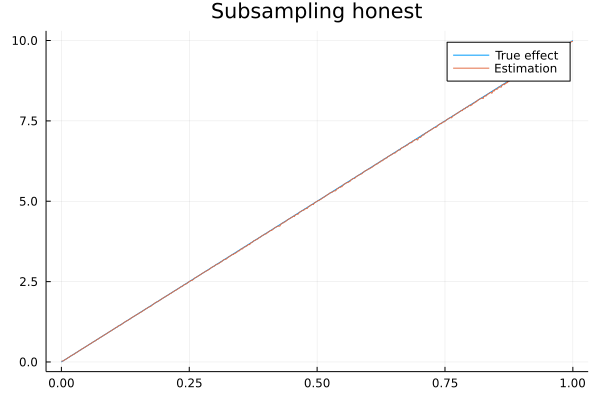

In [9]:
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].*10;
pred1 = apply_forest(cf1, Xtest);
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "Subsampling honest", fmt = :png)

In [10]:
get_freq(cf1, 3)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [11]:
get_freq(cf1, 5)

Dict{Any, Float64} with 1 entry:
  1 => 1.0

In [12]:
get_freq(cf1, 10)

Dict{Any, Float64} with 10 entries:
  5  => 0.0063398
  4  => 0.00608066
  6  => 0.00591407
  7  => 0.00599736
  2  => 0.00608529
  10 => 0.00617784
  9  => 0.00598811
  8  => 0.00593258
  3  => 0.00602513
  1  => 0.945459

In [13]:
get_freq(cf1, 1000)

Dict{Any, Float64} with 10 entries:
  5  => 0.0063398
  4  => 0.00608066
  6  => 0.00591407
  7  => 0.00599736
  2  => 0.00608529
  10 => 0.00617784
  9  => 0.00598811
  8  => 0.00593258
  3  => 0.00602513
  1  => 0.945459

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^4$ observations

In [ ]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, true, Y, T, X, true, 10, 1000);

In [ ]:
get_freq(cf1, 3)

In [ ]:
get_freq(cf1, 5)

In [ ]:
get_freq(cf1, 10)

In [ ]:
get_freq(cf1, 1000)

$n=10^5$ maintenant

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + 0.5$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

$n=10^5$ observations

In [ ]:
n, m = 10^5, 10
u = Uniform()
features = rand(u, (n, m))
X = features
d = Normal()
eps = rand(d, n)
b = Bernoulli()
T = convert(Vector{Int64},rand(b, n))
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ 0.5

cf1 = build_forest(false, true, Y, T, features, true, 10, 1000);

In [ ]:
get_freq(cf1, 3)

In [ ]:
get_freq(cf1, 5)

In [ ]:
get_freq(cf1, 10)

In [ ]:
get_freq(cf1, 1000)

Modèle

$$\Theta(X) = 10 X_1$$

$$Y = \Theta(X) T + \epsilon$$

X est 10 features toutes uniformes sur [0,1].

T suit loi bernouilli p=0.5.

Epsilon suit loi normale (0,1).

$n=10^5$ observations

In [ ]:
Y = features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0].*T  .+ eps

cf1 = build_forest(false, true, Y, T, X, true, 10, 1000);

In [ ]:
get_freq(cf1, 3)

In [ ]:
get_freq(cf1, 5)

In [ ]:
get_freq(cf1, 10)

In [ ]:
get_freq(cf1, 1000)

In [ ]:
n, m = 10^4, 10
u = Uniform()
features = rand(u, (n, m))
d = Normal()
eps = rand(d, 10000)
labels = cos.(features*[10, 0, 0, 0, 0, 0, 0, 0, 0, 0]) + sin.(features*[0, 0, 2, 0, 0, 0, 3, 0, 0, 0]) .+ eps

model = build_forest_oob(labels, features, 10, 1000);

In [ ]:
get_freq(model, 3)

In [ ]:
get_freq(model, 5)

In [ ]:
get_freq(model, 10)